# Name: Kunal Ghosh

# Course: M.Tech (Aerospace Engineering)

# Subject: AE 291 (Matrix Computations)

# SAP No.: 6000007645

# S.R. No.: 05-01-00-10-42-22-1-21061

********************************************************************************************************************

# Importing the necessary libraries

In [1]:
import numpy as np

In [2]:
from matplotlib import cm

In [3]:
import matplotlib.pyplot as plt

# Problem: 
## Solving 2D Poisson’s problem using Successive Overrelaxation (SOR) iterative methods
## Consider the 2D Poisson’s equation in the domain $\Omega$ = [0,1] $\times$ [0, 1], the unit square:

$$-\frac{\partial^2 u}{\partial x^2 } -\frac{\partial^2 u}{\partial y^2 } = f\qquad in \qquad \Omega, \tag{1}$$

## with the boundary condition
$$u = g \qquad on \qquad \partial \Omega \tag{2}$$ 

## where f and g are given functions, and ∂Ω represents the boundary of Ω. Eq. 1 can be discretized using the centered Finite difference method (as explained in the class).

## Consider the case where f = 0, and g is given as,

$$g(x,y) = \begin{cases}
0 \qquad\qquad\qquad if\:x = 0
\\
y \qquad\qquad\qquad if\:x = 1
\\
(x-1)sin(x) \:\:\:\:\:\:\: if\:y = 0
\\
x(2-x) \qquad\:\:\:\:\:\: if\:y = 1
\end{cases}$$

## Solve the discretized Poisson’s problem using Successive Overrelaxation (SOR) iterative method for various values of $\omega$, the relaxation parameter (see lecture notes). Note that when $\omega$ = 1, SOR method collapses to Gauss-Seidel method. Take the initial guess as $u^{(0)} = 0$. Consider three mesh intervals: h = 1/10, h = 1/20 and h = 1/40. The iterations should be continued until the relative change in the solution u from one iteration to another is less than $10^{-8}$ . More precisely, stop the iterations when

$$\frac{||u^{(k+1)}-u^{(k)}||_2}{||u^{(k+1)}||_2} < 10^{-8} \tag{3}$$

## For each h,

## 1. Perform the iterations for $\omega$ = {0.8, 1.0, 1.4, 1.6, 1.8, 1.9}. Plot the relative change in the solution (LHS of Eq. 3) versus the iteration index (k) for each $\omega$ on a single plot. In the plot, the relative change in the solution should be in base-10 logarithmic scale (For example, see the command ”semilogy” in matlab). Report the optimal $\omega$ for which the iterations required to reach the convergence criteria (Eq. 3) is minimum.

********************************************************************************************************************

## Answer (1):

## Set of values of the h

In [4]:
H = [1/10,1/20,1/40]

## Set of values of the $\omega$

In [5]:
W = [0.8,1.0,1.4,1.6,1.8,1.9]

## Defining the domain: $\Omega$ = [0,1] $\times$ [0, 1]

In [6]:
x_0 = 0

In [7]:
x_l = 1

In [8]:
y_0 = 0

In [9]:
y_l = 1

## Function to implement the boundary conditions

$$g(x,y) = \begin{cases}
0 \qquad\qquad\qquad if\:x = 0
\\
y \qquad\qquad\qquad if\:x = 1
\\
(x-1)sin(x) \:\:\:\:\:\:\: if\:y = 0
\\
x(2-x) \qquad\:\:\:\:\:\: if\:y = 1
\end{cases}$$

In [10]:
def g(x,y):
    """
    g(x,y) sets the boundary conditions at based on the coordinates of the node, x and y.
    If the given node does not lie on the boundary then 0 will be returned.
    x: x coordinate
    y: y coordinate
    """
    if x == 0:
        return 0
    if x == 1:
        return y
    if y == 0:
        return (x-1)*np.sin(x)
    if y == 1:
        return x*(2-x)
    else: 
        return 0

In [11]:
def f(x,y):
    """
    f(x,y) evaluated the function f of the question based on the coordinates of the node, x and y.
    x: x coordinate
    y: y coordinate
    """
    return 0

## Stopping criteria:

$$\frac{||u^{(k+1)}-u^{(k)}||_2}{||u^{(k+1)}||_2} < 10^{-8} \tag{3}$$

In [12]:
def Error_Function(u_new,u):
    """
    Error_Function(u_new,u) evaluates the error.
    u_new: u(k+1)
    u: u(k)
    """
    
    # Calculating the numerator
    temp = (((u_new.flatten()-u.flatten())**2).sum())**0.5
    
    # Calculating the denominator
    temp_1 = (((u_new.flatten())**2).sum())**0.5
    
    # Calculating the error
    temp = temp/temp_1
    
    return temp

In [13]:
Tolerance = 1e-8

## A dictionary to store errors

In [14]:
Error = {}

## A dictionary to store u

In [15]:
U = {}

## A dictionary to store meshgrids

In [16]:
X_Y_dict = {}

$$-\frac{\partial^2 u}{\partial x^2 } -\frac{\partial^2 u}{\partial y^2 } = f\qquad in \qquad \Omega$$

$$\frac{\partial^2 u}{\partial x^2 } + \frac{\partial^2 u}{\partial y^2 } = -f\qquad in \qquad \Omega$$

$$\Delta x = \Delta y = h$$

$$\frac{u_{(i+1,j)} - 2u_{(i,j)} + u_{(i-1,j)}}{h^2 } + \frac{u_{(i,j+1)} - 2u_{(i,j)} + u_{(i,j-1)}}{h^2 } = f_{(i,j)}$$

or, $$\frac{u_{(i+1,j)} - 2u_{(i,j)} + u_{(i-1,j)} + u_{(i,j+1)} - 2u_{(i,j)} + u_{(i,j-1)}}{h^2 } = f_{(i,j)}$$

or, $$\frac{u_{(i+1,j)} + u_{(i,j+1)} - 4u_{(i,j)} + u_{(i-1,j)} + u_{(i,j-1)}}{h^2 } = f_{(i,j)}$$

or, $$u_{(i+1,j)} + u_{(i,j+1)} - 4u_{(i,j)} + u_{(i-1,j)} + u_{(i,j-1)} = h^2f_{(i,j)}$$

or, $$u_{(i+1,j)} + u_{(i,j+1)} + u_{(i-1,j)} + u_{(i,j-1)} - h^2f_{(i,j)}= 4u_{(i,j)}$$

or, $$\frac{u_{(i+1,j)} + u_{(i,j+1)} + u_{(i-1,j)} + u_{(i,j-1)} - h^2f_{(i,j)}}{4}= u_{(i,j)}$$

or, $$u_{(i,j)} = \frac{u_{(i+1,j)} + u_{(i,j+1)} + u_{(i-1,j)} + u_{(i,j-1)} - h^2f_{(i,j)}}{4}$$

## SOR Iteration:

$$u^{k+1}_{(i,j)} = u^{k}_{(i,j)} + w\delta$$

or, $$u^{k+1}_{(i,j)} = u^{k}_{(i,j)} + w(\hat{u}^{k}_{(i,j)} - u^{k}_{(i,j)})$$

Let, $$I = (n \times i) + j$$

So, $$u^{k+1}_{I} = u^{k}_{I} + w(\hat{u}^{k}_{I} - u^{k}_{I})$$

As, $$\hat{u}^{k}_{I} = \frac{b_I - \displaystyle \sum^{n}_{J=I+1} a_{IJ}u^k_{J} - \displaystyle \sum^{I-1}_{J=1} a_{IJ}u^{k+1}_{J}}{a_{II}}$$

So, $$u^{k+1}_{I} = u^{k}_{I} + w \left(\frac{b_I - \displaystyle \sum^{n}_{J=I+1} a_{IJ}u^k_{J} - \displaystyle \sum^{I-1}_{J=1} a_{IJ}u^{k+1}_{J}}{a_{II}} - u^{k}_{I}\right)$$

## But the equation for grid point (i,j) only involves (i+1,j), (i-1,j), (i,j+1) and (i,j-1).

$$u_{(i,j)} = \frac{u_{(i+1,j)} + u_{(i,j+1)} + u_{(i-1,j)} + u_{(i,j-1)} - h^2f_{(i,j)}}{4}$$

## Thus, the equation for grid point I (I = $(n\times i) + j$) only involves:

$$I_1 = (n \times (i+1)) + j > I$$
$$I_2 = (n \times (i-1)) + j < I$$
$$I_3 = (n \times (i)) + j - 1 < I$$
$$I_4 = (n \times (i)) + j + 1 > I$$

So, $$\hat{u}^{k}_{I} = \frac{b_I - \displaystyle \sum^{n}_{J=I+1} a_{IJ}u^k_{J} - \displaystyle \sum^{I-1}_{J=1} a_{IJ}u^{k+1}_{J}}{a_{II}}$$

or, $$\hat{u}^{k}_{I} = \frac{b_I - \displaystyle \sum^{n}_{J>I} a_{IJ}u^k_{J} - \displaystyle \sum_{J<I} a_{IJ}u^{k+1}_{J}}{a_{II}}$$

or, $$\hat{u}^{k}_{I} = \frac{b_I - \displaystyle \sum_{J=I_1,I_4} a_{IJ}u^k_{J} - \displaystyle \sum_{J=I_2,I_3} a_{IJ}u^{k+1}_{J}}{a_{II}}$$

As, $$u_{(i,j)} = \frac{u_{(i+1,j)} + u_{(i,j+1)} + u_{(i-1,j)} + u_{(i,j-1)} - h^2f_{(i,j)}}{4}$$

So, $$\hat{u}_{I} = \frac{u_{I_1} + u_{I_4} + u_{I_2} + u_{I_3} - h^2f_{I}}{4}$$

So, $$\hat{u}^{k}_{I} = \frac{u^{k}_{I_1} + u^{k}_{I_4} + u^{k+1}_{I_2} + u^{k+1}_{I_3} - h^2f_{I}}{4}$$

So, $$\hat{u}^{k}_{(i,j)} = \frac{u^k_{(i+1,j)} + u^k_{(i,j+1)} + u^{k+1}_{(i-1,j)} + u^{k+1}_{(i,j-1)} - h^2f_{(i,j)}}{4}$$

As, $$u^{k+1}_{I} = u^{k}_{I} + w(\hat{u}^{k}_{I} - u^{k}_{I})$$

So, $$u^{k+1}_{(i,j)} = u^{k}_{(i,j)} + w(\hat{u}^{k}_{(i,j)} - u^{k}_{(i,j)})$$

So, $$u^{k+1}_{(i,j)} = u^{k}_{(i,j)} + w\left(\left(\frac{u^k_{(i+1,j)} + u^k_{(i,j+1)} + u^{k+1}_{(i-1,j)} + u^{k+1}_{(i,j-1)} - h^2f_{(i,j)}}{4}\right) - u^{k}_{(i,j)}\right)$$

In [17]:
def SOR_Solver(u,U,Error,Tolerance,f,x,y,w,h):
    """
    SOR_Solver(u,U,Error,Tolerance,f,x,y,w): Solves the given poisson equation using the SOR method
    u: Initial value of u in the computational domain
    U: Dictionary to store u for different values of h
    Error: Dictionary to store error at each iterations for different values of h
    Tolerance: Stopping Criteria
    f: RHS of the equation
    x: X Meshgrid
    y: Y Meshgrid
    w: the relaxation parameter
    h: mesh interval
    """
    # u at the next iteration
    u_old = u.copy()

    # Intializing the tolerance achieved
    temp = Tolerance + 1

    # Error over iterations for some particular h and w
    error = []

    # While loop until the stopping criteria is met
    while temp >= Tolerance:
        
        # Updating u
        u_old = u.copy()
        
        # NOTE: We are not calculating the values of u at the boundary nodes
        for i in range(1,u.shape[0]-1):
            
            # NOTE: We are not calculating the values of u at the boundary nodes
            for j in range(1,u.shape[1]-1):
                
                # SOR Iteration step
                u[i][j] = u[i][j] + (w*((0.25*(u[i+1][j] + u[i][j+1] + u[i-1][j] + u[i][j-1] - ((h**2)*f(x[i,j],y[i,j])))) - u[i][j]))
        
        # Calculating the relative error
        temp = Error_Function(u,u_old)
        
        # Storing the errors corresponding to each iteration
        error.append(temp)
        
    # Storing u in the dictionary for some particular h and w
    U[(h,w)] = u_old
    
    # Storing error in the dictionary for some particular h and w
    Error[(h,w)] = error

In [18]:
# Iterating over different values of h (Mesh Interval)
for h in H:
    
    # Iterating over different values of w (Successive Overrelaxation Factor)
    for w in W:
        
        # Mesh intervals
        dx = h
        dy = h

        # Number of the grid points
        n = (int((x_l-x_0)/dx)-1)*(int((y_l-y_0)/dy)-1)

        # Creating a meshgrid
        x = np.arange(x_0,x_l+dx,dx)
        y = np.arange(y_0,y_l+dy,dy)
        X,Y = np.meshgrid(x,y,indexing = "ij")

        # Storing meshgrids
        X_Y_dict[h] = (X,Y)

        # Intializing the u at the current iteraion with zeros
        u = np.zeros(((int((x_l-x_0)/dx))+1,(int((y_l-y_0)/dy))+1))

        # Applying the boundary conditions
        for i in range(u.shape[0]):
            for j in range(u.shape[1]):
                u[i,j] = g(x[i],y[j])

        # Solving the system of equation using SOR Method
        SOR_Solver(u,U,Error,Tolerance,f,X,Y,w,h)

        iteraions = len(Error[(h,w)])

        print(f"For h = {h} and w = {w} :")
        print(f"Number of iterations required: {iteraions}\n\n")

For h = 0.1 and w = 0.8 :
Number of iterations required: 231


For h = 0.1 and w = 1.0 :
Number of iterations required: 157


For h = 0.1 and w = 1.4 :
Number of iterations required: 66


For h = 0.1 and w = 1.6 :
Number of iterations required: 41


For h = 0.1 and w = 1.8 :
Number of iterations required: 84


For h = 0.1 and w = 1.9 :
Number of iterations required: 174


For h = 0.05 and w = 0.8 :
Number of iterations required: 836


For h = 0.05 and w = 1.0 :
Number of iterations required: 574


For h = 0.05 and w = 1.4 :
Number of iterations required: 259


For h = 0.05 and w = 1.6 :
Number of iterations required: 150


For h = 0.05 and w = 1.8 :
Number of iterations required: 88


For h = 0.05 and w = 1.9 :
Number of iterations required: 176


For h = 0.025 and w = 0.8 :
Number of iterations required: 3000


For h = 0.025 and w = 1.0 :
Number of iterations required: 2069


For h = 0.025 and w = 1.4 :
Number of iterations required: 949


For h = 0.025 and w = 1.6 :
Number of iterati

For h = 0.1, optimal w is 1.6


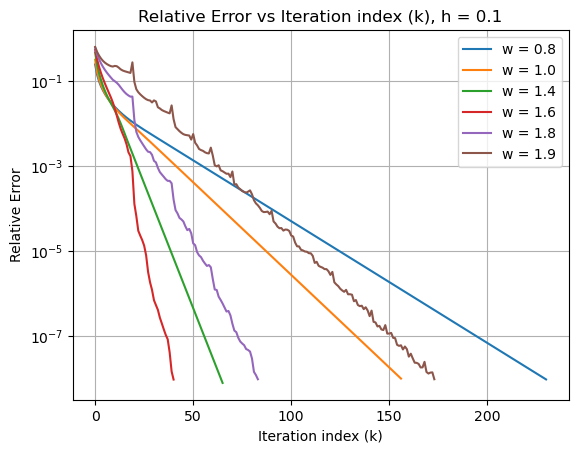

For h = 0.05, optimal w is 1.8


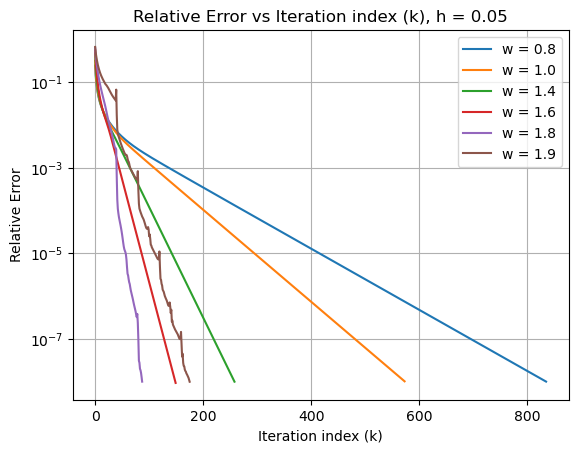

For h = 0.025, optimal w is 1.9


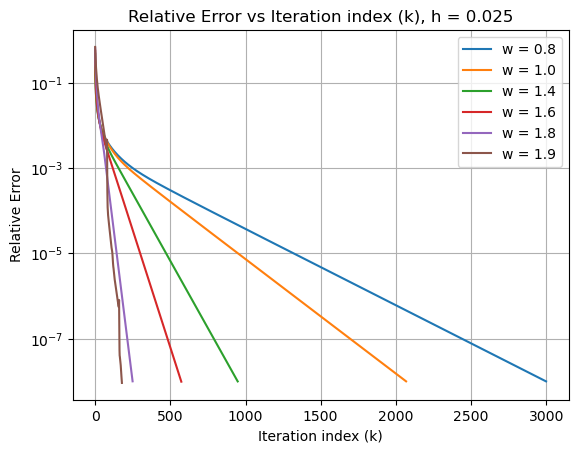

In [19]:
for h_1 in H:
    temp = len(Error[list(Error.keys())[0]])
    for (h,w),error in Error.items():
        if h == h_1:
            temp_new = len(error)
            if temp_new <= temp:
                temp = temp_new
                w_optimum = w
            plt.semilogy(error,label = "w = "+str(w))
    plt.legend()
    # NOTE: Here, the iteration index k starts from 0
    plt.xlabel("Iteration index (k)")
    plt.ylabel("Relative Error")
    plt.title(f"Relative Error vs Iteration index (k), h = {h_1}")
    plt.grid()
    print(f"For h = {h_1}, optimal w is {w_optimum}")
    plt.show()

## For h = 0.1, optimal $\omega$ is 1.6
## For h = 0.05, optimal $\omega$ is 1.8
## For h = 0.025, optimal $\omega$ is 1.9

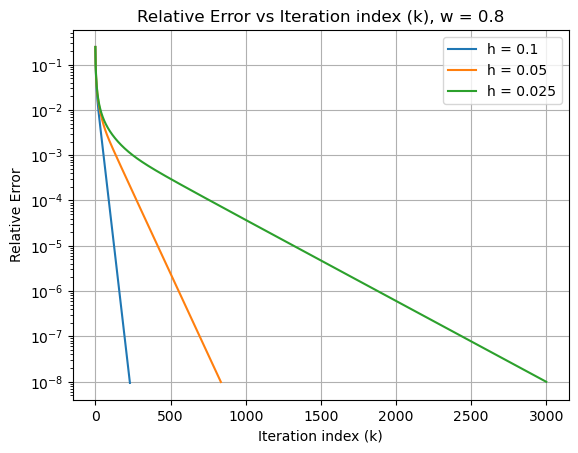

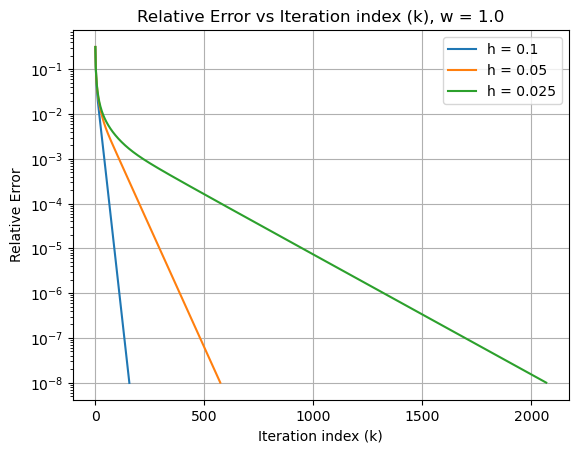

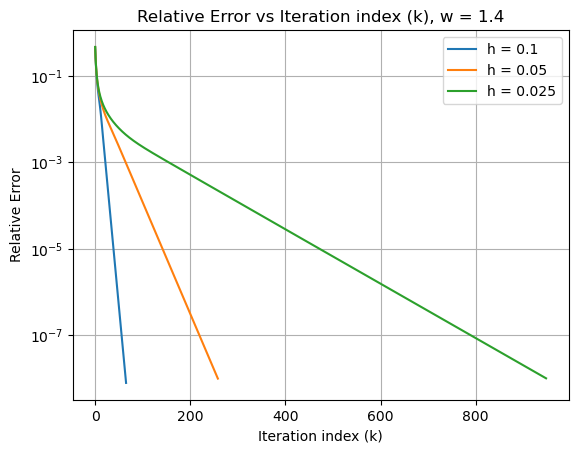

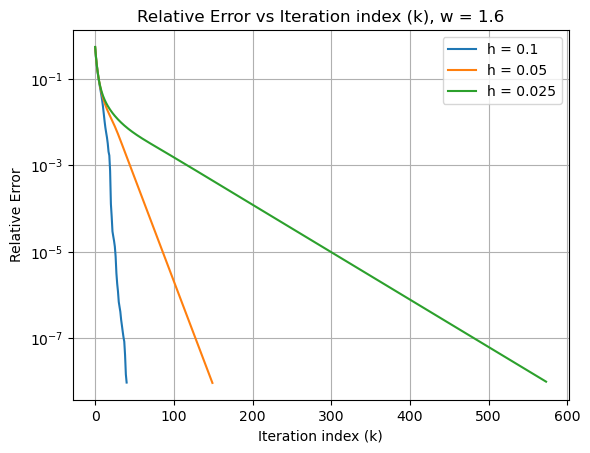

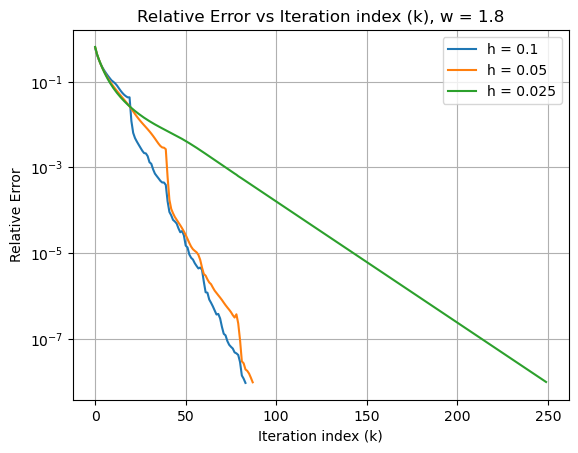

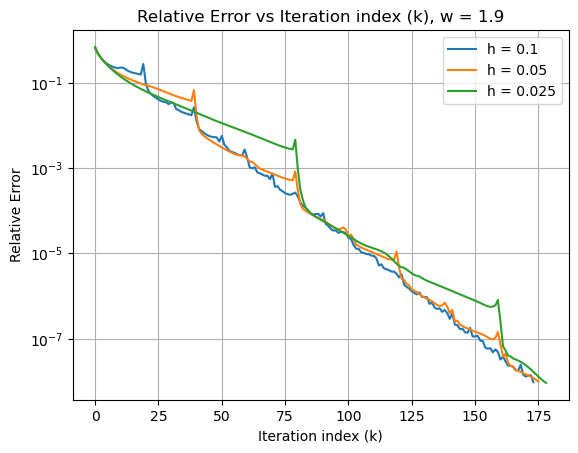

In [20]:
for w_1 in W:
    for (h,w),error in Error.items():
        if w == w_1:
            plt.semilogy(error,label = "h = "+str(h))
    plt.legend()
    # NOTE: Here, the iteration index k starts from 0
    plt.xlabel("Iteration index (k)")
    plt.ylabel("Relative Error")
    plt.title(f"Relative Error vs Iteration index (k), w = {w_1}")
    plt.grid()
    plt.show()

## Observation: The total number of iterations required is approximately the same on increasing $\omega$ to a very large value such as 1.9, provided it is still less than 2.

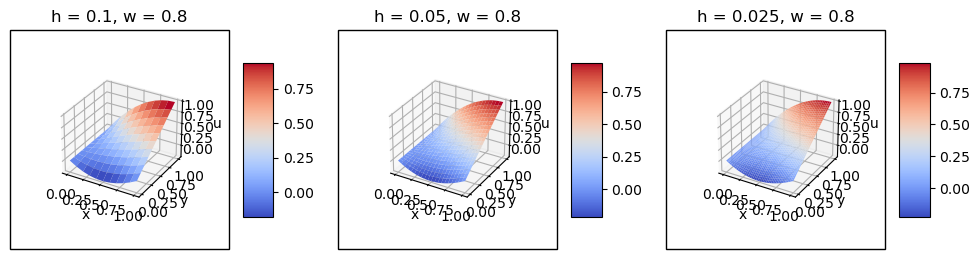

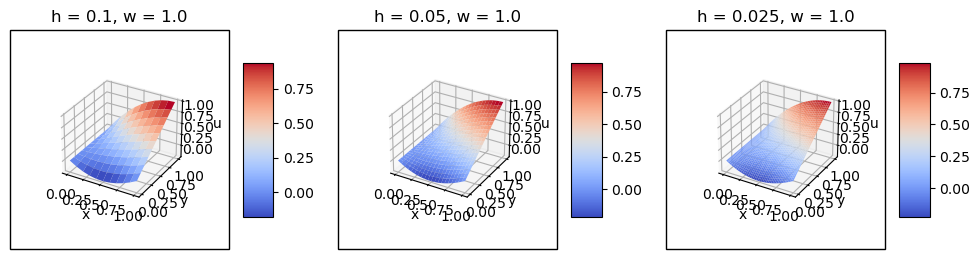

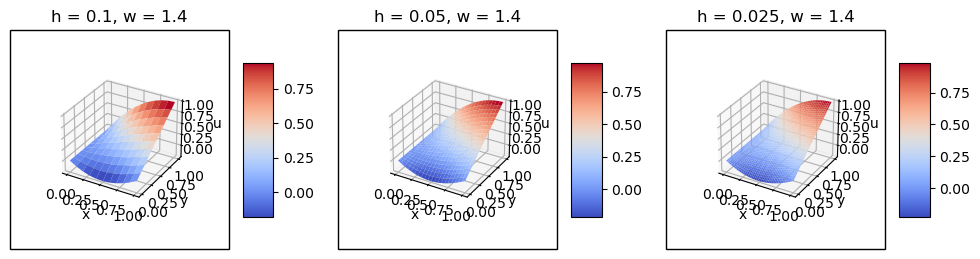

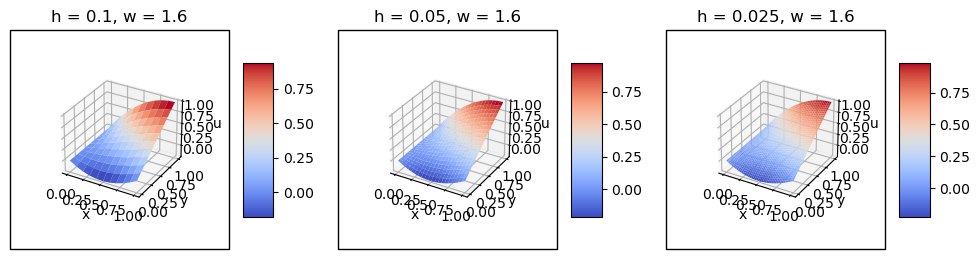

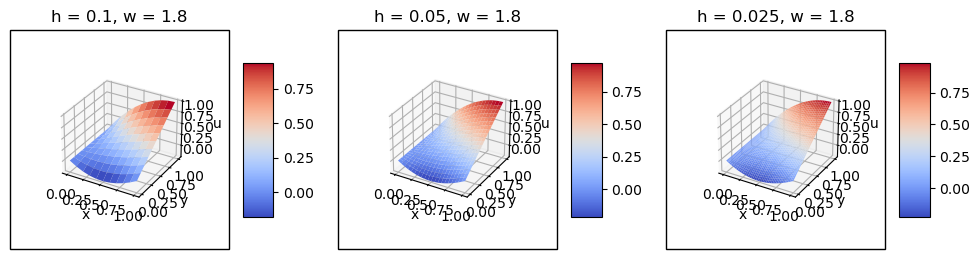

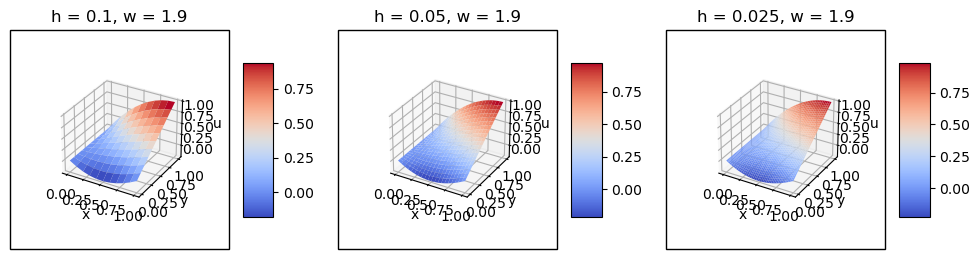

In [21]:
for w_1 in W:
    fig = plt.figure()
    fig.set_size_inches(12,4)
    ctr = 1
    for (h,w),u in U.items():
        if w == w_1:
            ax = fig.add_subplot(1,3,ctr,projection = "3d")
            ctr = ctr+1
            surf = ax.plot_surface(X_Y_dict[h][0], X_Y_dict[h][1], u, cmap=cm.coolwarm,linewidth=0)
            fig.colorbar(surf, shrink=0.5, aspect=5)
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("u")
            ax.set_title(f"h = {h}, w = {w}")
            ax.set_box_aspect(aspect=None, zoom=0.625)
            ax.patch.set_edgecolor('black')  
            ax.patch.set_linewidth(1)  
    plt.show()

## 2. For $\omega$ = 1 (Gauss-Seidel), show a 3D surface plot of the final solution u (as a function of x and y). Also compare the iterations required for the Gauss Seidel and the Jacobi method (from Assignment 2) to reach the convergence criteria.

********************************************************************************************************************

## Answer (2):

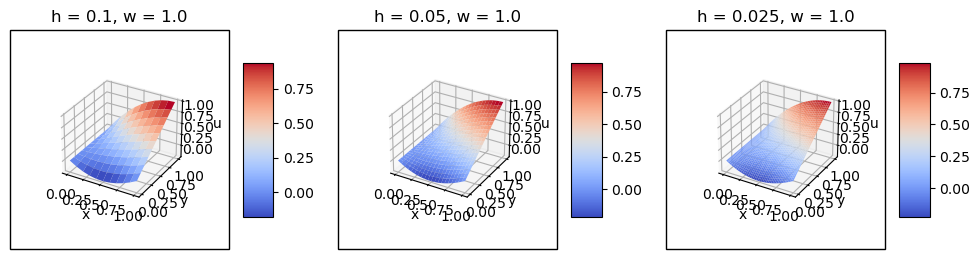

In [22]:
fig = plt.figure()
fig.set_size_inches(12,4)
ctr = 1
for (h,w),u in U.items():
    if w == 1:
        ax = fig.add_subplot(1,3,ctr,projection = "3d")
        ctr = ctr+1
        surf = ax.plot_surface(X_Y_dict[h][0], X_Y_dict[h][1], u, cmap=cm.coolwarm,linewidth=0)
        fig.colorbar(surf, shrink=0.5, aspect=5)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("u")
        ax.set_title(f"h = {h}, w = {w}")
        ax.set_box_aspect(aspect=None, zoom=0.625)
        ax.patch.set_edgecolor('black')  
        ax.patch.set_linewidth(1)  
plt.show()

# Iteration required for Gauss-Siedel method:
# If h = 0.1, then iterations = 157
# If h = 0.05, then iterations = 574
# If h = 0.025, then iterations = 2069

# Iteration required for Jacobi method:
# If h = 0.1, then iterations = 293
# If h = 0.05, then iterations = 1077
# If h = 0.025, then iterations = 3882

## In conclusion, the number of iterations required for Gauss-Seidel method is approximately half as compared to Jacobi method.